## Script for BI Job in USA:

In [1]:
import pandas as pd
import numpy as np
import seaborn
from nltk.corpus import stopwords
from itertools import chain
from nltk.probability import FreqDist

In [2]:
data_read=pd.read_csv("developer_BI_usa.csv",delimiter=",",header=0)

In [6]:
data_read.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,ETL Developer,Incandescent Technologies,NaN,Headquartered in One World Trade Center at the...,This position is in New York. Relocation to ot...
1,New+York,ETL Developer,Raymour & Flanigan,NaN,"ETL Developer Syracuse, NY Raymour & Flanigan'...","ETL Developer\nSyracuse, NY\n\nRaymour & Flani..."
2,New+York,ETL Tester New York,Nessium Consulting,NaN,5+ years of experience working on IT projects....,5+ years of experience working on IT projects....
3,New+York,ETL Developer,Mediacom Communications Corporation,NaN,At least 2-3 years of Informatica experience r...,The Data Warehouse ETL Developer is responsibl...
4,New+York,ETL Developer,M&T Bank,NaN,ETL developer with minimum 8 years experience ...,ETL Developer-3DLS2\nDescription:\n\nETL Devel...


## Preprocessing:

In [4]:
# enlever ponctuation
data_read["resume"]= data_read["resume"].str.replace('[^\w\s]','')
data_read["description"]=data_read["description"].str.replace('[^\w\s]','')
# transformer les lettres en minuscule:
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x.lower() for x in np.str(x).split()))
# enlever stopword 
stop = stopwords.words('english')
data_read["resume"] = data_read["resume"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))
data_read["description"]=data_read["description"].apply(lambda x: " ".join(x for x in np.str(x).split() if x not in stop))

Lorsque l'on fait le lemmisation ou stemisation certaines mots clés changent donc pour cette étude, on va garder nos données textuelles telle qu'elle est.

In [5]:
len([k.lower() for k in data_read.utituler_offre  if "developer" in k.lower() or "data" in k.lower() ])

4252

## Analyse descriptif:
Tout d'abord, on va faire une fonction qui va retourner un dataframe contenant la liste des mots comme rowname et comme colonne les occurences.

In [6]:
from collections import Counter
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
def word_count_text(List_text,N_min=7500,tokenizer_true=False):
    der="".join(List_text)
    tokens = nltk.word_tokenize(" ".join(List_text))
    fdist=FreqDist(tokens)
    ## Compter le nombre d'occurence des mots
    dict_word=dict(fdist)
    # On enregistre les mots dans un dataframe
    pd_dict_word=pd.DataFrame(list(dict_word.values()),index=dict_word.keys(),columns=["occurence"])
    pd_dict_word=pd_dict_word.sort_values(by="occurence",ascending=False)
    ## On filtre les mots dont l'occurence sont supérieurs à N_min
    pd_dict_word=pd_dict_word.loc[pd_dict_word.occurence>N_min,:]
    # on retourne un dataframe
    return pd_dict_word

## Bag of word:¶

Dans cette partie, on va contruire notre sac de mot d'une part, et d'autre part, on va aussi compter le nombre de fois où revient un mot.Ici on ne va conciderer que les mots ayant comme occurence plus de 7500 fois.


In [7]:
description=data_read.description.tolist()
pd_dict_word= word_count_text(description)

## Visualisation des mots les plus fréquents:

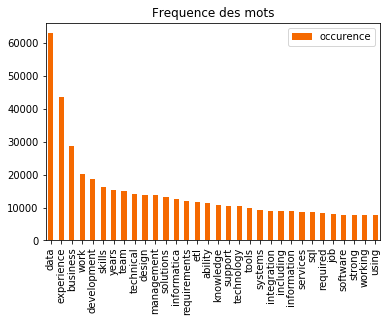

In [8]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

Pour avoir une visualisation de nos données de façon assez concret, on va faire un wordclouding:

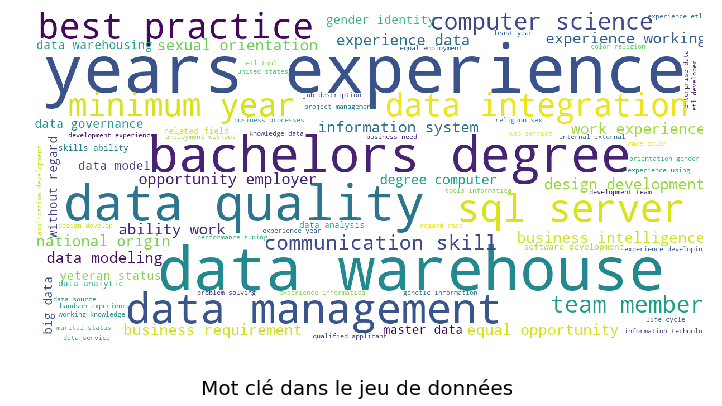

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
stopwords = set(STOPWORDS) 
def show_wordcloud(data,stopwords=stopwords,title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## word clue:
Dans cette partie, on va étudier les mots clés que l'on considère être des mots  clés connus dans le domaine de la data science. On va tout d'abord étudier les mots liés au outils utilisés dans le domaine de la data science. Pour le logiciel r on va mettre des espaces avant et après la lettre r pour ne pas considérer les lettres r dans d'autres mots.

In [10]:
Mot_cle_technique = ['python','r','sql','java','scala','excel',"ruby",
        'aws','hadoop','spark','linux','tableau',"nosql","Oracle","etl","crm",
               'linux','sas','hive','oracle','perl',"informatica",'Cognos',"hbase",
               'mysql','html','sap','spss','mongodb',"c++","postgresql","pig"]

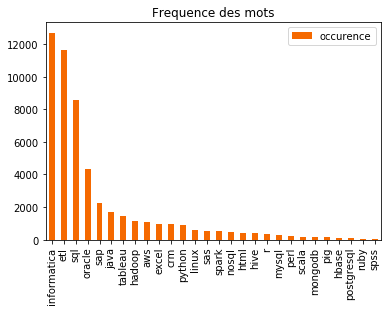

In [11]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

## Filtre que sur les postes de data et developer:

In [12]:
bolean=[ True if "developer" in k.lower() or "data" in k.lower() else False for k in data_read.utituler_offre]

In [13]:
data_filtered=data_read[bolean]

In [14]:
data_filtered.head()

,ville,utituler_offre,entreprise,localisation,resume,description
0,New+York,ETL Developer,Incandescent Technologies,NaN,headquartered one world trade center heart new...,position new york relocation parts us may avai...
1,New+York,ETL Developer,Raymour & Flanigan,NaN,etl developer syracuse ny raymour flanigans co...,etl developer syracuse ny raymour flanigans co...
3,New+York,ETL Developer,Mediacom Communications Corporation,NaN,least 23 years informatica experience required...,data warehouse etl developer responsible indep...
4,New+York,ETL Developer,M&T Bank,NaN,etl developer minimum 8 years experience softw...,etl developer3dls2 description etl developer b...
5,New+York,INFORMATICA DEVELOPER,Montefiore Medical Center,NaN,informatica hands development experience knowl...,business intelligence analytics organization l...


## Revisualisation des données:

In [15]:
description=data_filtered.description.tolist()
pd_dict_word= word_count_text(description,N_min=3500)

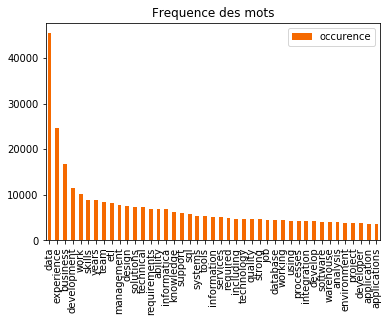

In [16]:
pd_dict_word.plot(kind='bar', color="#f56900", title='Frequence des mots');

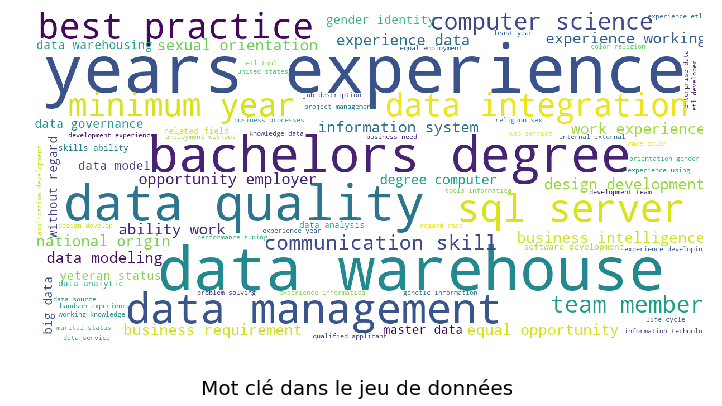

In [17]:
comment_words =""
for single in data_read['description']:
    comment_words = str(comment_words)
    comment_words += single
show_wordcloud(comment_words,title="Mot clé dans le jeu de données")

## Outil visualisation

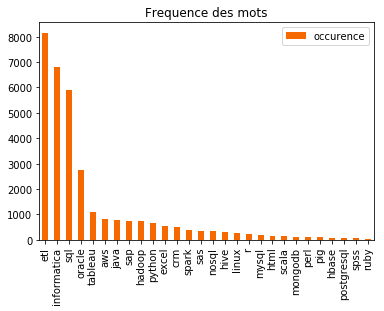

In [18]:
pd_dict_word_all=word_count_text(description,N_min=0)
bol=[True if k in Mot_cle_technique else False for k in pd_dict_word_all.index ]
mot_outils=pd_dict_word_all[bol]
mot_outils.plot(kind='bar', color="#f56900", title='Frequence des mots');

On constate qu'après une filtre il n'y a pas bcp de changement.

In [20]:
data_filtered.to_csv("developer_BI_Big_data.csv",index=False)

In [19]:
data_filtered.shape

(4252, 6)

In [4]:
data_read.shape

(7380, 6)